# Setting up environment:

In [ ]:
pip install k-means-constrained

In [ ]:
from k_means_constrained import KMeansConstrained
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample 1:

In [ ]:
X = np.array([[1, 2],[1.5,1],[3,1],[2,2],[3,3],[2.5,3.5], [2, 4], [1, 0],[4, 2],[1.5,3.5], [3, 4], [4, 0], [3,3],[4,1]])
clf = KMeansConstrained(n_clusters=3, size_min=2, size_max=5,random_state=0)
clf.fit_predict(X)

array([1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2], dtype=int32)

In [ ]:
test_df = pd.DataFrame(X)
test_df = test_df.rename(columns={0:'x',1:'y'})

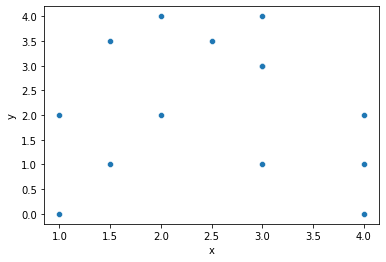

In [ ]:
sns.scatterplot(x=test_df.x, y=test_df.y)

In [ ]:
test_df

,x,y
0,1.0,2.0
1,1.5,1.0
2,3.0,1.0
3,2.0,2.0
4,3.0,3.0
5,2.5,3.5
6,2.0,4.0
7,1.0,0.0
8,4.0,2.0
9,1.5,3.5


In [ ]:
test_df['cluster'] = clf.fit_predict(X).tolist()
test_df

,x,y,cluster
0,1.0,2.0,1
1,1.5,1.0,1
2,3.0,1.0,2
3,2.0,2.0,1
4,3.0,3.0,0
5,2.5,3.5,0
6,2.0,4.0,0
7,1.0,0.0,1
8,4.0,2.0,2
9,1.5,3.5,1


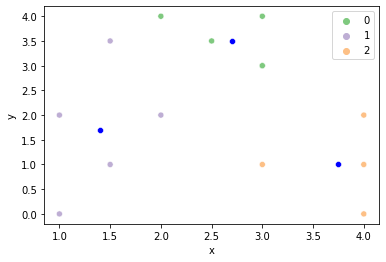

In [ ]:
sns.scatterplot(x=test_df.x, y=test_df.y, hue=test_df.cluster, palette='Accent')
sns.scatterplot(x=clf.cluster_centers_[:,0], y=clf.cluster_centers_[:,1], color='b')

In [ ]:
clf.cluster_centers_

array([[2.66666667, 3.66666667],
       [4.        , 1.        ],
       [1.        , 1.        ]])

# Sample 2:

In [ ]:
# opening file:
df_original = pd.read_excel('/content/Base_de_datos_con_direcciones_limpias.xlsx')
df_original.columns

Index(['Unnamed: 0', 'Curso', 'ESTUDIANTE', 'DIRECCION', 'BARRIO', 'RUTA',
       'CIUDAD', 'Num_Ruta', 'Direccion_Clean', 'Direccion_final', 'Marker',
       'latitudes', 'longitudes', 'coordenadas'],
      dtype='object')

In [ ]:
df = df_original.copy()
df = df[df['latitudes'] != 'not found'].reset_index()
real_test_df = df[df['RUTA'] < 5].reset_index()
real_test_df = real_test_df.drop(['level_0','index','Unnamed: 0'], axis = 1)
real_test_df

,Curso,ESTUDIANTE,DIRECCION,BARRIO,RUTA,CIUDAD,Num_Ruta,Direccion_Clean,Direccion_final,Marker,latitudes,longitudes,coordenadas
0,04B,VALENZUELA HERRERA SARA,CLLE 81 # 115 20 BL 6 APTO 412,CORTIJO,1,BOGOTA,Ruta_1,calle 81 # 115 20,calle 81 # 115 20 BOGOTA Colombia,VALENZUELA HERRERA SARA calle 81 # 115 20,4.72435,-74.1202,"(4.724351, -74.1202114)"
1,09D,ESTEPA VALDERRAMA MARIA JIMENA,"CLLE 81# 114-50 (TORRE A2, 501)",CORTIJO,1,BOGOTA,Ruta_1,calle 81# 114 50,calle 81# 114 50 BOGOTA Colombia,ESTEPA VALDERRAMA MARIA JIMENA calle 81# 114 50,4.72415,-74.1192,"(4.7241476, -74.1191685)"
2,06D,OJEDA GOMEZ ANA SOFIA,CLLE 81 # 115 15 APTO 507 INT 4,EL CORTIJO,1,BOGOTA,Ruta_1,calle 81 # 115 15,calle 81 # 115 15 BOGOTA Colombia,OJEDA GOMEZ ANA SOFIA calle 81 # 115 15,4.72399,-74.1208,"(4.7239944, -74.12078439999999)"
3,10B,NUÑEZ JAIMES ANNY DANIELA,CRA 114 # 80 51 INT 15 APTO 504,EL CORTIJO,1,BOGOTA,Ruta_1,carrera 114 # 80 51,carrera 114 # 80 51 BOGOTA Colombia,NUÑEZ JAIMES ANNY DANIELA carrera 114 # 80 51,4.72284,-74.121,"(4.7228366, -74.1209799)"
4,05F,GALEANO ROZO GABRIEL,CRA 114 # 80 51 INT 2 APTO 303,EL CORTIJO,1,BOGOTA,Ruta_1,carrera 114 # 80 51,carrera 114 # 80 51 BOGOTA Colombia,GALEANO ROZO GABRIEL carrera 114 # 80 51,4.72284,-74.121,"(4.7228366, -74.1209799)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11C,VARGAS ORTIZ VALENTINA,CLLE 81 # 113 46 CS 18,CIUDADELA COLSUBSIDIO,4,BOGOTA,Ruta_4,calle 81 # 113 46,calle 81 # 113 46 BOGOTA Colombia,VARGAS ORTIZ VALENTINA calle 81 # 113 46,4.72266,-74.1189,"(4.7226573, -74.1188679)"
124,06A,JIMENEZ SANCHEZ ANDRES JOSE,CRA 112 BIS # 81 51 BLO 13 APTO 501,CIUDADELA COLSUBSIDIO,4,BOGOTA,Ruta_4,carrera 112 bis # 81 51,carrera 112 bis # 81 51 BOGOTA Colombia,JIMENEZ SANCHEZ ANDRES JOSE carrera 112 bis # ...,4.72119,-74.1172,"(4.7211937, -74.1172292)"
125,03J,AMADO SALAZAR SARA MARIA,CRA 112 BIS # 81 51 INT 4 APTO 501,CIUDADELA COLSUBSIDIO,4,BOGOTA,Ruta_4,carrera 112 bis # 81 51,carrera 112 bis # 81 51 BOGOTA Colombia,AMADO SALAZAR SARA MARIA carrera 112 bis # 81 51,4.72119,-74.1172,"(4.7211937, -74.1172292)"
126,09F,INFANTE SANCHEZ JUAN SEBASTIAN,CRA 112 F # 80-85 INTERIOR 42 APTO 301,CIUDADELA COLSUBSIDIO,4,BOGOTA,Ruta_4,carrera 112 f # 80 85,carrera 112 f # 80 85 BOGOTA Colombia,INFANTE SANCHEZ JUAN SEBASTIAN carrera 112 f #...,4.72091,-74.119,"(4.7209106, -74.1189966)"


In [ ]:
len(real_test_df)

128

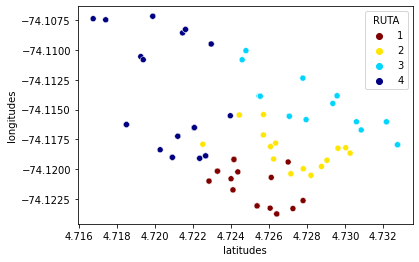

In [ ]:
sns.scatterplot(x=real_test_df.latitudes, y=real_test_df.longitudes, hue=real_test_df.RUTA, palette='jet_r')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'

In [ ]:
locations = np.array(real_test_df[['latitudes','longitudes']])

In [ ]:
clf = KMeansConstrained(n_clusters=4, size_min=13, size_max=32,random_state=0)
clf.fit_predict(locations)

array([2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 3, 2, 3, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3,
       3, 0, 0, 0, 0, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [ ]:
real_test_df['cluster'] = clf.fit_predict(locations).tolist()
#real_test_df

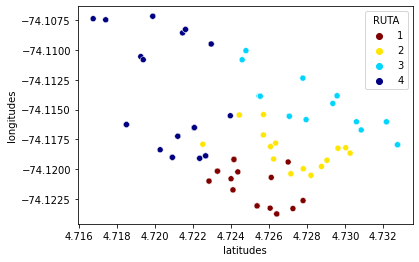

In [ ]:
sns.scatterplot(x=real_test_df.latitudes, y=real_test_df.longitudes, hue=real_test_df.RUTA, palette='jet_r')

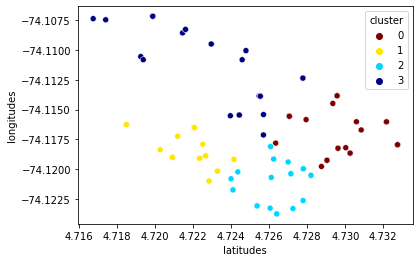

In [ ]:
sns.scatterplot(x=real_test_df.latitudes, y=real_test_df.longitudes, hue=real_test_df.cluster, palette='jet_r', legend='brief')

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
def mapa_de_cluster(cluster):
  temp_df = real_test_df[real_test_df['cluster']== cluster].reset_index()
  temp_locations =  temp_df[['latitudes', 'longitudes']]
  temp_locationlist = temp_locations.values.tolist()
  avg_latitud = temp_df['latitudes'].mean()
  avg_longitud = temp_df['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  map = folium.Map(location=avg_location, zoom_start=16)
  for point in range(0, len(temp_locationlist)):
    folium.Marker(temp_locationlist[point], popup=temp_df['ESTUDIANTE'][point]).add_to(map)
  return map

In [ ]:
mapa_de_cluster(3)

In [ ]:
def mapa_de_ruta_actual(ruta):
  temp_df = real_test_df[real_test_df['RUTA']== ruta].reset_index()
  temp_locations =  temp_df[['latitudes', 'longitudes']]
  temp_locationlist = temp_locations.values.tolist()
  avg_latitud = temp_df['latitudes'].mean()
  avg_longitud = temp_df['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  map = folium.Map(location=avg_location, zoom_start=16)
  for point in range(0, len(temp_locationlist)):
    folium.Marker(temp_locationlist[point], popup=temp_df['ESTUDIANTE'][point]).add_to(map)
  return map

In [ ]:
mapa_de_ruta_actual(4)